In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

Primero, importamos las librerias a usar.

In [2]:
wines=pd.read_csv("D:/Documentoss/Carlos/trabajos de la compu gris/Tareas de facultad/Semestre 7/mineria datos/wine/winemag-data_first150k.csv")
wines

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


Ahora guardamos el data frame en una variable para poder trabajar con la información

In [3]:
wines.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

Hacemos una revisión rápida para saber qué columnas tienen datos nulos

In [4]:
wines2=wines.rename(columns = {'Unnamed: 0':'ID'})
wines2

,ID,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


Renombramos la primer columna, ahora será el ID de los vinos

In [5]:
a=wines2.country.unique()
a.shape
a

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

Revisamos cuantos datos únicos hay en la columna países

In [6]:
wines3=wines2.drop({'ID','description','designation','province','region_1','region_2','variety','winery'},axis=1)
wines3

,country,points,price
0,US,96,235.0
1,Spain,96,110.0
2,US,96,90.0
3,US,96,65.0
4,France,95,66.0
...,...,...,...
150925,Italy,91,20.0
150926,France,91,27.0
150927,Italy,91,20.0
150928,France,90,52.0


Eliminamos todas las columnas, excepto el ID, el país, el puntaje y el costo para hacer un pequeño análisis de en qué país se concentran los mejores vinos?

In [7]:
#América
USwinesp=wines3[wines3["country"]=="US"]
USwinesp
MXwinesp=wines3[wines3["country"]=="Mexico"]
MXwinesp
ARwinesp=wines3[wines3["country"]=="Argentina"]
ARwinesp
#Europa
FRwinesp=wines3[wines3["country"]=="France"]
FRwinesp
ITwinesp=wines3[wines3["country"]=="Italy"]
ITwinesp
#Africa
SAwinesp=wines3[wines3["country"]=="South Africa"]
SAwinesp
MOwinesp=wines3[wines3["country"]=="Morocco"]
MOwinesp
#Asia
CHwinesp=wines3[wines3["country"]=="China"]
CHwinesp
JAwinesp=wines3[wines3["country"]=="Japan"]
JAwinesp
#Oceanía
AUwinesp=wines3[wines3["country"]=="Australia"]
AUwinesp
NZwinesp=wines3[wines3["country"]=="New Zealand"]
NZwinesp



,country,points,price
25,New Zealand,94,57.0
305,New Zealand,94,57.0
1171,New Zealand,93,46.0
1184,New Zealand,93,33.0
1185,New Zealand,93,40.0
...,...,...,...
150368,New Zealand,84,12.0
150377,New Zealand,84,NaN
150378,New Zealand,84,NaN
150382,New Zealand,84,16.0


En este bloque de código hacemos 5 clases, cada una con los puntos y precios de los vinos en 5 países distintos

In [8]:
USwinesp.isnull().sum() #null: 258 price
MXwinesp.isnull().sum() #null:0
ARwinesp.isnull().sum() #null:44 price
FRwinesp.isnull().sum() #null:6313 price
ITwinesp.isnull().sum() #null:4694 price
SAwinesp.isnull().sum() #null:21 price
MOwinesp.isnull().sum() #null:3 price
CHwinesp.isnull().sum() #null:0 price
JAwinesp.isnull().sum() #null:0 price
AUwinesp.isnull().sum() #null:63 price
NZwinesp.isnull().sum() #null:250 price

country      0
points       0
price      250
dtype: int64

En este bloque contamos los datos nulos que tenemos en cada base de datos de cada país. Como podemos ver en la columna de puntos no hay datos nulos, y en la columna de precios hay algunos dependiendo del país, por lo que la mayoría del análisis se hará con base en los puntajes.

In [9]:
wines4=wines3.drop("price",axis=1)
wines4

,country,points
0,US,96
1,Spain,96
2,US,96
3,US,96
4,France,95
...,...,...
150925,Italy,91
150926,France,91
150927,Italy,91
150928,France,90


In [10]:
indexnms=wines4[(wines4["country"]=='Spain') | (wines4["country"]=='Bulgaria') | (wines4["country"]=='Portugal') | (wines4["country"]=='Israel')  | (wines4["country"]=='Greece') | (wines4["country"]=='Chile') | (wines4["country"]=='Egypt') | (wines4["country"]=='Romania') | (wines4["country"]=='Germany') | (wines4["country"]=='Canada') | (wines4["country"]=='Moldova') | (wines4["country"]=='Hungary') | (wines4["country"]=='Austria') | (wines4["country"]=='Croatia') | (wines4["country"]=='Slovenia') | (wines4["country"]== 'nan') | (wines4["country"]=='India') | (wines4["country"]=='Turkey') | (wines4["country"]=='Macedonia') | (wines4["country"]=='Lebanon') | (wines4["country"]=='Serbia') | (wines4["country"]=='Uruguay') | (wines4["country"]=='Switzerland') | (wines4["country"]=='Albania') | (wines4["country"]=='Bosnia and Herzegovina') | (wines4["country"]=='Brazil') | (wines4["country"]=='Cyprus') | (wines4["country"]=='Lithuania') | (wines4["country"]=='South Korea') | (wines4["country"]=='Ukraine') | (wines4["country"]=='England') | (wines4["country"]=='Georgia') | (wines4["country"]=='Montenegro') | (wines4["country"]=='Luxembourg') | (wines4["country"]=='Slovakia') | (wines4["country"]=='Czech Republic') | (wines4["country"]=='Tunisia') | (wines4["country"]=='US-France') ].index
countries=wines4.drop(indexnms)
countries

,country,points
0,US,96
2,US,96
3,US,96
4,France,95
8,US,95
...,...,...
150925,Italy,91
150926,France,91
150927,Italy,91
150928,France,90


In [11]:
#América
USwines=wines4[wines4["country"]=="US"]
USwines
MXwines=wines4[wines4["country"]=="Mexico"]
MXwines
ARwines=wines4[wines4["country"]=="Argentina"]
ARwines
#Europa
FRwines=wines4[wines4["country"]=="France"]
FRwines
ITwines=wines4[wines4["country"]=="Italy"]
ITwines
#Africa
SAwines=wines4[wines4["country"]=="South Africa"]
SAwines
MOwines=wines4[wines4["country"]=="Morocco"]
MOwines
#Asia
CHwines=wines4[wines4["country"]=="China"]
CHwines
JAwines=wines4[wines4["country"]=="Japan"]
JAwines
#Oceanía
AUwines=wines4[wines4["country"]=="Australia"]
AUwines
NZwines=wines4[wines4["country"]=="New Zealand"]
NZwines


,country,points
25,New Zealand,94
305,New Zealand,94
1171,New Zealand,93
1184,New Zealand,93
1185,New Zealand,93
...,...,...
150368,New Zealand,84
150377,New Zealand,84
150378,New Zealand,84
150382,New Zealand,84


#### Hasta este punto terminamos de limpiar la información para sólo quedarnos con los países de nuestro interés

In [12]:
countries['points'].mean()
#countries[countries.country=='Mexico'].mean()

88.02150555086672

In [13]:
countries["points"].describe()

count    123224.000000
mean         88.021506
std           3.244239
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

En estos bloques calculamos el promedio general de los países y una descripción general con estos datos nos damos cuenta que el promedio de los 11 paises elegidos es 88 puntos, el puntaje mínimo es 80 mientras que el máximo es 100 y que su desviación estándar es de alrededor de 3.

In [14]:
print("Paises de América")
print(USwines.min(),USwines.max())
print(MXwines.min(),MXwines.max())
print(ARwines.min(),ARwines.max())

print("Paises de Europa")
print(FRwines.min(),FRwines.max())
print(ITwines.min(),ITwines.max())

print("Paises de África")
print(SAwines.min(),SAwines.max())
print(MOwines.min(),MOwines.max())

print("Paises de Asia")
print(CHwines.min(),CHwines.max())
print(JAwines.min(),JAwines.max())

print("Paises de Oceanía")
print(AUwines.min(),AUwines.max())
print(NZwines.min(),NZwines.max())


Paises de América
country    US
points     80
dtype: object country     US
points     100
dtype: object
country    Mexico
points         80
dtype: object country    Mexico
points         92
dtype: object
country    Argentina
points            80
dtype: object country    Argentina
points            97
dtype: object
Paises de Europa
country    France
points         80
dtype: object country    France
points        100
dtype: object
country    Italy
points        80
dtype: object country    Italy
points       100
dtype: object
Paises de África
country    South Africa
points               80
dtype: object country    South Africa
points               95
dtype: object
country    Morocco
points          82
dtype: object country    Morocco
points          93
dtype: object
Paises de Asia
country    China
points        82
dtype: object country    China
points        82
dtype: object
country    Japan
points        85
dtype: object country    Japan
points        85
dtype: object
Paises de Oceanía
c

Aquí podemos observar el mínimo y máximo de cada país.

In [15]:
print("Paises de América")
print("USA")
print(USwines.skew(),USwines.kurt())
print("México")
print(MXwines.skew(),MXwines.kurt())
print("Argentina")
print(ARwines.skew(),ARwines.kurt())

print("Paises de Europa")
print("Francia")
print(FRwines.skew(),FRwines.kurt())
print("Italia")
print(ITwines.skew(),ITwines.kurt())

print("Paises de África")
print("Sudáfrica")
print(SAwines.skew(),SAwines.kurt())
print("Marruecos")
print(MOwines.skew(),MOwines.kurt())

print("Paises de Asia")
print("China")
print(CHwines.skew(),CHwines.kurt())
print("Japón")
print(JAwines.skew(),JAwines.kurt())

print("Paises de Oceanía")
print("Australia")
print(AUwines.skew(),AUwines.kurt())
print("Nueva Zelanda")
print(NZwines.skew(),NZwines.kurt())


Paises de América
USA
points    0.140477
dtype: float64 points   -0.529779
dtype: float64
México
points    0.611552
dtype: float64 points   -0.196973
dtype: float64
Argentina
points    0.318359
dtype: float64 points   -0.244034
dtype: float64
Paises de Europa
Francia
points    0.128871
dtype: float64 points   -0.362129
dtype: float64
Italia
points    0.380098
dtype: float64 points    0.109953
dtype: float64
Paises de África
Sudáfrica
points    0.037762
dtype: float64 points   -0.074273
dtype: float64
Marruecos
points   -0.70293
dtype: float64 points    2.420004
dtype: float64
Paises de Asia
China
points    0.0
dtype: float64 points   NaN
dtype: float64
Japón
points   NaN
dtype: float64 points   NaN
dtype: float64
Paises de Oceanía
Australia
points    0.145488
dtype: float64 points    0.071235
dtype: float64
Nueva Zelanda
points   -0.177777
dtype: float64 points   -0.216915
dtype: float64


Aquí podemos ver la simetría y la curtosis, con la simetría sabemos que si el valor es positivo, tenemos que la mayoría de los valores se encuentran a la izquierda de la gráfica, si el valor es cero tenemos que la mayoría estan alrededor de la media y la gráfica se comporta como una normal, en caso de que el valor sea negativo podemos decir que la mayoría de los valores están a la derecha de la gráfica.
Por otro lado, con la curtosis se concluye con valores en torno al 3, si es menor a 3 como en los casos anteriores se dice que los valores no están tan concentrados alrededor de la media, en caso de que sea mayor a3 concluiríamos que los valores se concentran mucho cerca de la media.

## Hasta aquí terminamos de estudiar los datos estadísticamente y pasamos a analizarlos gráficamente 

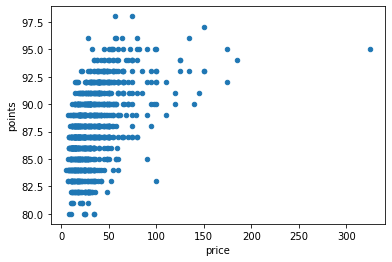

In [16]:
USwinesp.sample(1000, replace=True).plot.scatter(x='price', y='points')

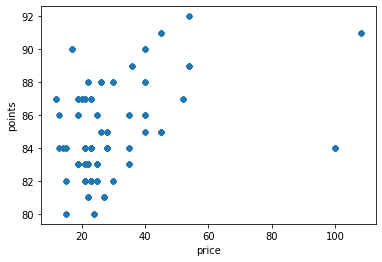

In [17]:
MXwinesp.sample(1000,replace=True).plot.scatter(x='price', y='points')

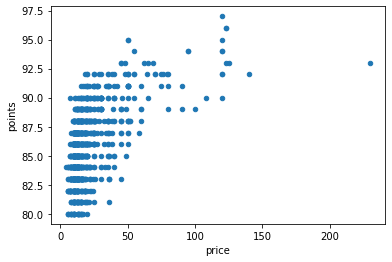

In [18]:
ARwinesp.sample(1000, replace=True).plot.scatter(x='price', y='points')

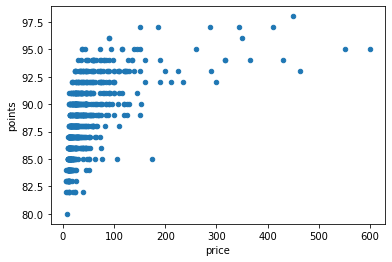

In [19]:
FRwinesp.sample(1000, replace=True).plot.scatter(x='price', y='points')

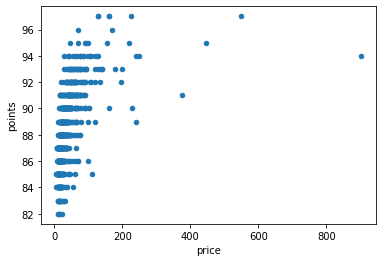

In [20]:
ITwinesp.sample(1000, replace=True).plot.scatter(x='price', y='points')

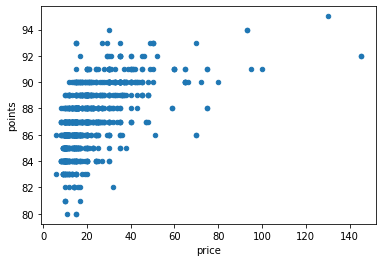

In [21]:
SAwinesp.sample(1000,replace=True).plot.scatter(x='price', y='points')

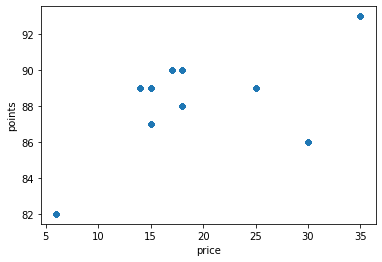

In [22]:
MOwinesp.sample(1000,replace=True).plot.scatter(x='price', y='points')

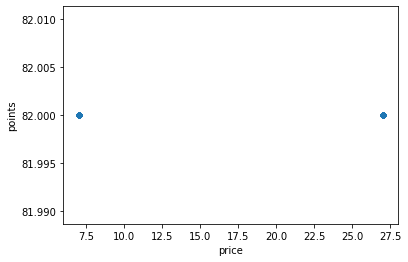

In [23]:
CHwinesp.sample(1000, replace=True).plot.scatter(x='price', y='points')

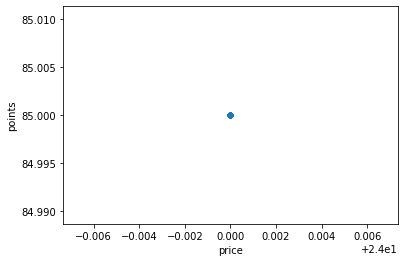

In [24]:
JAwinesp.sample(1000, replace=True).plot.scatter(x='price', y='points')

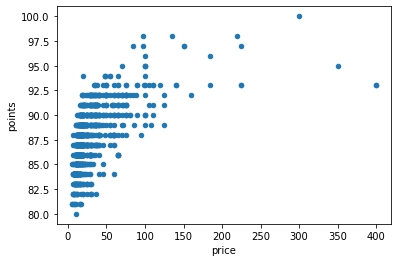

In [25]:
AUwinesp.sample(1000, replace=True).plot.scatter(x='price', y='points')

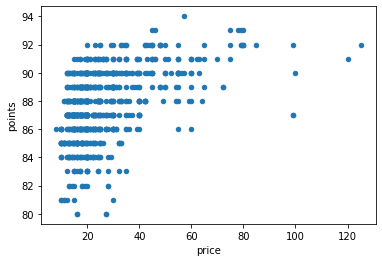

In [26]:
NZwinesp.sample(1000, replace=True).plot.scatter(x='price', y='points')

### Gráfica de scatter, matplotlib
-Igual que la que sigue nos sirve para observar de manera más fácil como se distribuyen los valores de precio y puntaje de cada país, podemos decir que, en general, se comportan muy parecido los diferentes países, a excepción de algunos paises como México, Japón y China, pero porque estos tienen menor cantidad de vinos que el resto.

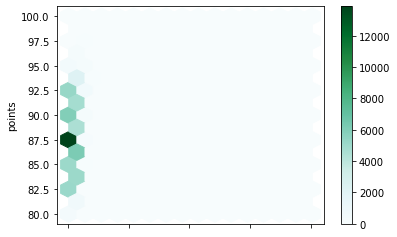

In [27]:
USwinesp.plot.hexbin(x='price', y='points', gridsize=15)

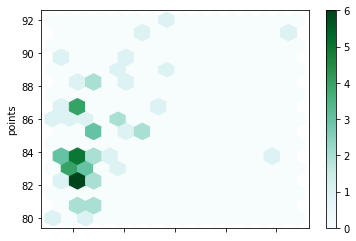

In [28]:
MXwinesp.plot.hexbin(x='price', y='points', gridsize=15)

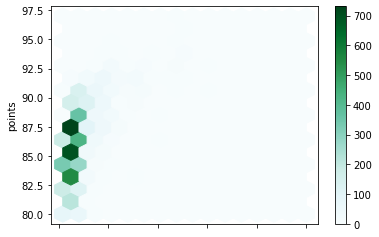

In [29]:
ARwinesp.plot.hexbin(x='price', y='points', gridsize=15)

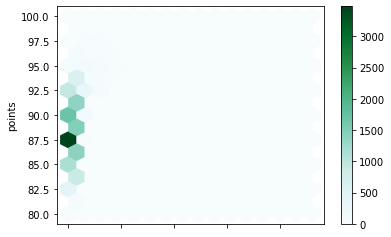

In [30]:
FRwinesp.plot.hexbin(x='price', y='points', gridsize=15)

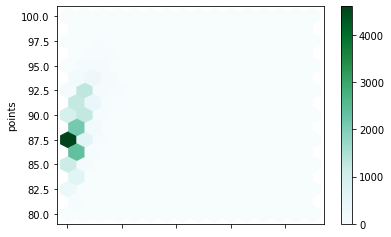

In [31]:
ITwinesp.plot.hexbin(x='price', y='points', gridsize=15)

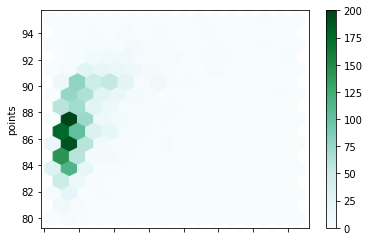

In [32]:
SAwinesp.plot.hexbin(x='price', y='points', gridsize=15)

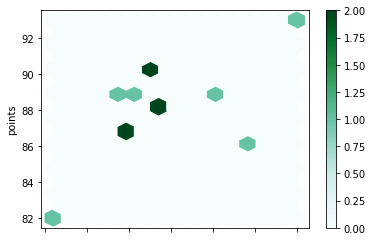

In [33]:
MOwinesp.plot.hexbin(x='price', y='points', gridsize=15)

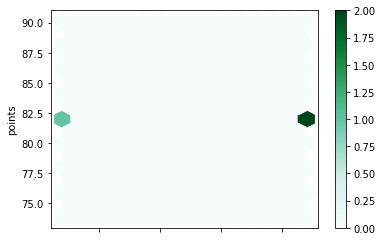

In [34]:
CHwinesp.plot.hexbin(x='price', y='points', gridsize=15)

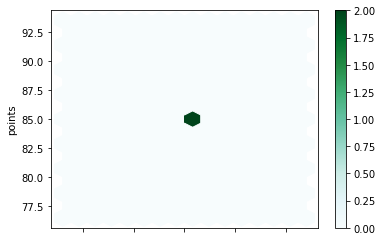

In [35]:
JAwinesp.plot.hexbin(x='price', y='points', gridsize=15)

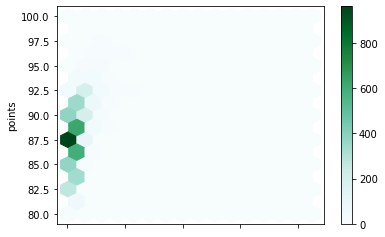

In [36]:
AUwinesp.plot.hexbin(x='price', y='points', gridsize=15)

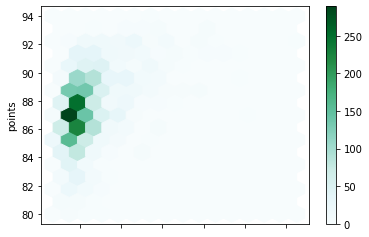

In [37]:
NZwinesp.plot.hexbin(x='price', y='points', gridsize=15)

### Gráfica de concentracion, matplotlib:
 - Con esta gráfica podemos reconocer visualmente dónde se concentran los vinos en los diferentes paises, por ejemplo, en casi todos la mayoría se concentra en los vinos "baratos" y con un puntaje de alrededor de 87, a excepción de México que tiene mas variado sus costos y su puntaje que tiene mayor concentración es 82, otros casos son Japón y China que tienen muy pocos vinos entre 2 y 3 y varían mucho sus concentraciones.

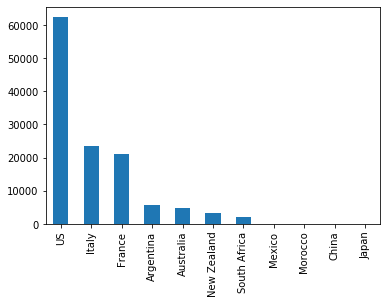

In [93]:
countries['country'].value_counts().plot.bar()

### Grafica de barras, matplotlib, por país
- Esta gráfica nos sirve para ver la cantidad de vinos que provienen de cada país, aquí podemos ver que hay demasiada diferencia entre los producidos en USA y los demás países.

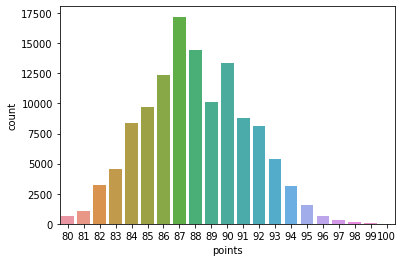

In [42]:
sns.countplot(countries["points"])

### Gráfica de barras, sns, por puntaje
- En esta gráfica podemos observar la distribución de los puntajes, su frecuencia, con la gráfica podemos concluir que el puntaje que más se repite es 87 y hay muy pocos que estén en los extremos, ya sea cerca de 100 o cerca de 80 que en este caso es el mínimo.

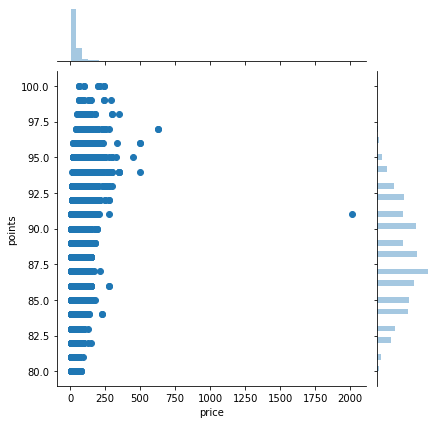

In [48]:
sns.jointplot(x='price', y='points', data=USwinesp)

### Gráfica de jointplot, sns
    Este gráfico funciona como la combinación de un gráfico de dispersión y un gráfico de barras aplicado para 'x' y 'y', en este caso como x es el precio, podemos observar que la mayoría de los datos están muy cargados a la izquierda, y en cuanto a los puntos están mas esparcidos y no tan concentrados hacia arriba o hacia abajo.
    Con esto podemos concluir que los precios tienen asimetría positiva, es decir, la mayoría de los datos se cargan a la izquierda y los puntajes se puede decir que se distribuyen similar a una normal. El estudio de esta gráfica se aplicó nada más a USA puesto que es el país con mayor número de vinos.

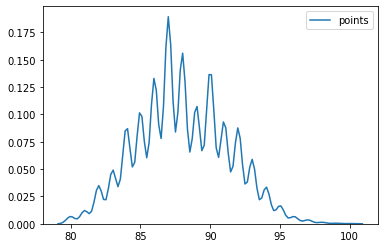

In [53]:
sns.kdeplot(countries.points)

### Gráfica de kdeplot, sns
    En esta gráfica lo primero que se observa es que hay muchos picos muy marcados, esto sucede porque los puntajes son numeros enteros, por lo tanto son valores discretos y no continuos.
    Además vemos que el gráfico nos sirve para sacar la misma conclusión que el gráfico de barras o un histograma, puesto que nos dice cómo se distribuyen las frecuencias de los puntajes de los vinos.

## Pregunta 1
### ¿Qué representan los datos de la gráfica de arriba?
- En el gráfico que aparece arriba de esta pregunta se está graficando la frecuencia de los puntajes de los vinos, la gráfica de barras en ese caso nos dice que la mayoría de los vinos tiene un puntaje de 87 y se puede ver que la gráfica se asemeja un poco a la gráfica de una distribución normal.